<a href="https://colab.research.google.com/github/Chirag314/XGBoost-glassdata/blob/main/XGBoost_glassdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is made from exercises from book Ensemble Machine Learning Cookbook.

XGBoost stands for extreme gradient boosting. It is a variant of the gradient boosting machine that aims to improve performance and speed. The XGBoost library in Python implements the gradient boosting decision tree algorithm. The name gradient boosting comes from its us of the gradient descent algorithm to minimize loss when adding new models. XGBoost can handle both regression and classification tasks.

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
#import required libraries

import seaborn as sns
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,r2_score,roc_curve, auc,accuracy_score
from sklearn.preprocessing import MinMaxScaler
import itertools

from sklearn import metrics

In [5]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter07/glassdata.csv'
df_glassdata= pd.read_csv(url)
#df = pd.read_csv(url)
print(df_glassdata.head(5))

   ID       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [6]:
#Check shape of data
df_glassdata.shape

(214, 11)

In [8]:
# Create feature and response variables
X=df_glassdata.iloc[:,1:10]

Y=df_glassdata.iloc[:,10]
print(X.shape)
print(Y.shape)


(214, 9)
(214,)


In [9]:
#Check missing values
df_glassdata.isnull().sum()

ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
#Split the data
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3,random_state=0,stratify=Y)

In [13]:
# Build xgbmodel
xg_model=XGBClassifier()
xg_model.fit(X_train,Y_train)

XGBClassifier(objective='multi:softprob')

NameError: ignored

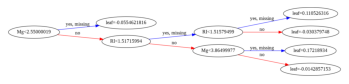

In [14]:
#We can visualize a single XGBoost decision tree from our trained model. Visualizing decision trees can provide insight into the gradient boosting process:
#The rankdir='LR' parameter plotted the tree from left to right. Setting rankdir to UT would plot a vertical tree. 
plot_tree(xg_model,num_trees=0,rankdir='LR')
fig=pyplot.gcf()
fig.set_size_inches(30,30)

NameError: ignored

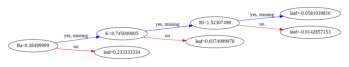

In [15]:
#With num_trees=0, we get the first boosted tree. We can view the other boosted trees by setting the index value to the num_trees parameter.
#We set num_trees=5
plot_tree(xg_model,num_trees=5,rankdir='LR')
fig=plot.gcf()
fig.set_size_inches(30,30)


In [18]:
#We will now use predict() on our test data to get the predicted values. We can see our test accuracy with accuracy_score()
test_predictions=xg_model.predict(X_test)
test_accuracy=accuracy_score(Y_test,test_predictions)

print("Test accuracy : %0.2f%%" % (test_accuracy*100.0))

Test accuracy : 83.08%


In [19]:
#We can see our confusion matrix 
confusion_matrix(Y_test,test_predictions)

array([[19,  2,  0,  0,  0,  0],
       [ 1, 21,  0,  0,  0,  1],
       [ 4,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  1],
       [ 0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  9]])

In [20]:
#We can then use a predefined function, plot_confusion_matrix(), which we have sourced from https://scikit-learn.org:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [21]:
#We then look at the unique values of our target variable to set the names of each level of our target variable
Y.unique()

array([1, 2, 3, 5, 6, 7])

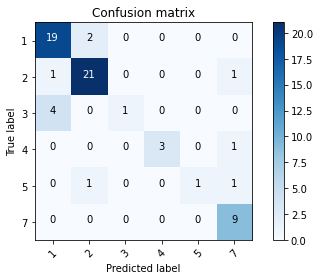

In [22]:
#set the names to each level of our target variable
target_names=['1','2','3','4','5','7']
cm=confusion_matrix(Y_test,test_predictions)
plt.figure()
plot_confusion_matrix(cm,classes=target_names)
plt.show()

In [23]:
#Check feature importance
print(xg_model.feature_importances_)

[0.05109863 0.06202332 0.07122978 0.04586057 0.02999706 0.04635512
 0.0396499  0.61077917 0.04300657]


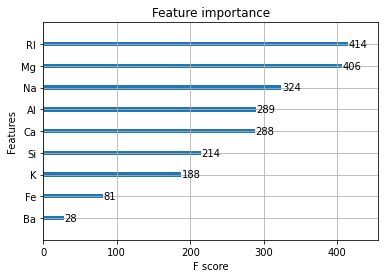

In [24]:
#We can also visualize feature importance using plot_importance()
plot_importance(xg_model)

Feature importance can be used for feature selection using SelectFromModel.

The SelectFromModel class is imported from sklearn.feature_selection.
In the following example, the SelectFromModel takes the pretrained XGBoost model and provides a subset from our dataset with the selected features. It decides on the selected features based on a threshold value. 

Features that have an importance that is greater than or equal to the threshold value are kept, while any others are discarded

In [36]:
# The threshold value to use for feature selection. 
import pandas as pd
from sklearn.feature_selection import SelectFromModel
feature_importance=xg_model.feature_importances_

#Select features using threshold
for each_threshold in feature_importance:
  selection=SelectFromModel(xg_model,threshold=each_threshold,prefit=True)
  #reduce x_train only to the selected features
  selected_feature_x_train=selection.transform(X_train)

  #Train the model
  selection_model=XGBClassifier()
  selection_model.fit(selected_feature_x_train,Y_train)

  # Reduce Xtrain only to the selected featues
  selected_feature_x_test=selection.transform(X_test)

  #Predict using the test value of the set
  predictions=selection_model.predict(selected_feature_x_test)
  accuracy=accuracy_score(Y_test,predictions)
  print("Threshold=%.5f, Number of Features=%d, Model Accuracy: %.2f%%" % (each_threshold, selected_feature_x_train.shape[1],accuracy*100))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromMode

Threshold=0.05110, Number of Features=4, Model Accuracy: 75.38%
Threshold=0.06202, Number of Features=3, Model Accuracy: 53.85%
Threshold=0.07123, Number of Features=2, Model Accuracy: 46.15%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromMode

Threshold=0.04586, Number of Features=6, Model Accuracy: 76.92%
Threshold=0.03000, Number of Features=9, Model Accuracy: 83.08%
Threshold=0.04636, Number of Features=5, Model Accuracy: 84.62%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromMode

Threshold=0.03965, Number of Features=8, Model Accuracy: 80.00%
Threshold=0.61078, Number of Features=1, Model Accuracy: 47.69%
Threshold=0.04301, Number of Features=7, Model Accuracy: 76.92%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


We notice that the performance of the model fluctuates with the number of selected features. Based on the preceding output, we decide to opt for five features that give us an accuracy value of 72%. Also, if we use the Occam's razor principle, we can probably opt for a simpler model with four features that gives us a slightly lower accuracy of 71%.
We can also evaluate our models using cross-validation. To perform k-fold cross-validation

In [39]:
kfold=KFold(n_splits=40)
xg_model_with_kfold=XGBClassifier()
cv_results=cross_val_score(xg_model_with_kfold,X_train,Y_train,cv=kfold,verbose=True)
print("Mean Accuracy: %.2f%% Standard Deviation %.2f%%" % (cv_results.mean()*100, cv_results.std()*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mean Accuracy: 68.75% Standard Deviation 22.95%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.8s finished


With cross_val_score(), we evaluate our model, which gives us the mean and standard deviation classification accuracy. We notice that we get a mean accuracy of 77.92% and a standard deviation of 22.33%
In our case, we have a target variable with six classes.

If you have many classes for a multi-class classification task, you may use stratified folds when performing cross-validation

In [43]:
Stratfold=StratifiedKFold(n_splits=40)
xg_model_with_stratfold=XGBClassifier()
sf_results=cross_val_score(xg_model_with_stratfold,X_train,Y_train,cv=Stratfold,verbose=True)
print("Mean Accuracy: %.2f%% Standard Deviation %.2f%%" % (sf_results.mean()*100, sf_results.std()*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=40.
  UserWarning,


Mean Accuracy: 68.12% Standard Deviation 22.74%


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.0s finished
